# Préparation des figures de statistiques descriptives

### Todo : 
Produire les figures, en global et par institution :
1. Ratio Femme/reste pour les acquisitions par année depuis 1945 : **DONE**
2. Age moyen à l'acquisition des hommes et des femmes (abandonné : deux bars a cote, mettre aussi le Q1 et Q3): **DONE**
3. Ratio oeuvres d'artistes Français/reste dans les acquisitions par nationalité (une courbe pour les hommes, une pour les femmes) **DONE**
4. Sortir sous forme de matrice colorée le ratio H/F dans les 29 domaines en fonction du temps
5. Sous forme de courbe, une par mode d'acquisition, le ratio de femme

### Important pour le rapport :
- sortir les figures en ratio 2:1
- format .png, background transparent

In [183]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re
import unicodedata
# %matplotlib inline

In [153]:
plt.rcParams["font.family"] = 'DejaVu Sans'
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
global color_h, color_f, color_b, PLOTDIM, FREQYEARS
color_h = "green"
color_f = "purple"
color_b = "lightgray"
PLOTDIM = (15,7.5)
FREQYEARS = 10

In [3]:
# Les données sont stockées dans le dossier "data", c'est plus clean
authors  = pd.read_csv('../data/ALL_AUTHORS (live_work + clean nat).csv',sep=',', low_memory=False)
art = pd.read_csv('../data/ALL_ARTWORKS.csv',low_memory=False)

### Etape préliminaire 1 : "donner un genre" aux oeuvres

In [4]:
authors.sample(20)

,Unnamed: 0,Unnamed: 0.1,Id artist,name,name extended,type,Birth year,Death year,Birth city,Birth state,Birth country,Death city,Death state,Death country,Gender,Nationality (original),ID artworks,average_year,artworks_creation_years,acquisition_year,name_lower,live_and_work,nationality_clean
9451,9451,9451,9000000000072533,Camille Hilaire,NaN,artiste,1916.0,2004.0,Metz,Moselle,France,NaN,NaN,NaN,masculin,française,180000000005333|180000000005335|20000000000606...,1957.0,1947|1951|1954|1956|1957|1959|1961|1961|1962,1957|1961|1951|1956|1956|1961|1969|1971|1974|1...,camille hilaire,0,française
33096,33096,33096,9000000000068670,Joël Brisse,NaN,artiste,1953.0,NaN,Vichy,Allier,France,NaN,NaN,NaN,masculin,française,200000000011610|290000000000245|14000000001452...,1981.0,1982|1984|1993|1993,1992|1983|1985|1994|1994,joël brisse,"Vit et travaille à Paris (Paris, France)",française
28210,28210,28210,140000000009452,Léon Jean Alfred Van de Put,NaN,artiste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,masculin,française,200000000021946|140000000088654|14000000010656...,1902.0,1900|1904,NaN,léon jean alfred van de put,0,française
9598,9598,9598,9000000000085331,Hanspeter Hofmann,NaN,artiste,1960.0,NaN,Mitlödi,NaN,Suisse,NaN,NaN,NaN,masculin,NaN,450000000000750|450000000000751|450000000000752,1991.0,2000|2003|2003,2004|2004|2004,hanspeter hofmann,0,NaN
19117,19117,19117,430000000013308,Lisa Oppenheim,NaN,artiste,1975.0,NaN,New York,New York,États-Unis,NaN,NaN,NaN,féminin,américaine,430000000013309|360000000016093|15000000135981...,2009.0,2010|2014|2014|2015|2015|2015|2015|2015,NaN,lisa oppenheim,"Vit et travaille à New York (New York, États-U...",américaine
3529,3529,3529,9000000000067199,Daniel Spoerri,NaN,artiste,1930.0,NaN,Galati,NaN,Royaume de Roumanie,NaN,NaN,NaN,masculin,suisse,180000000007353|80000000000949|250000000086227...,1930.0,NaN,NaN,daniel spoerri,Vit et travaille à Vienne (Autriche) et à Segg...,suisse
35474,35474,35474,200000000001210,Ernest Clair-Guyot,NaN,artiste,1860.0,1938.0,NaN,NaN,NaN,NaN,NaN,NaN,masculin,française,200000000012301,1899.0,NaN,1961,ernest clair-guyot,0,française
10332,10332,10332,140000000005388,Théodore Joseph Napoléon Jacques,NaN,artiste,1804.0,1876.0,Paris,NaN,France,Paris,NaN,France,masculin,française,140000000080972|140000000086946|140000000086947,1840.0,NaN,1848|1848|1848,théodore joseph napoléon jacques,0,française
33246,33246,33246,140000000010019,EDF R&D DESIGN,Département Recherche et Développement d'EDF :...,groupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,groupe,NaN,140000000820887,NaN,NaN,2009,edf r&d design,0,NaN
24586,24586,24586,80000000024477,Benjamin W. Schumacher,NaN,artiste,1985.0,NaN,Kitchener,NaN,Canada,NaN,NaN,NaN,masculin,canadienne,80000000024497,1999.0,2014,2014,benjamin w. schumacher,"Vit et travaille à New York (New York, États-U...",canadienne


In [5]:
art['Gender'] = None
counter = 0
done = 0
length = len(art)
done_percentage = 0

for _,i in art.iterrows():
    counter += 1
    if pd.isnull(i['authors']) == False:
        c = re.split(r'\|', i['authors'])#split
        # If several authors: we see if they all have same gender, else "groupe"
        if len(c) > 1:
            gender_list = [authors[authors['Id artist'] == int(b)]['Gender'].values[0] for b in c]
            if all("masculin" == g for g in gender_list):
                var = "masculin"
            elif all("féminin" == g for g in gender_list):
                var = "féminin"
            else:
                var = "groupe"
        # If one author: trivial
        else:
            b = c[0]
            var = authors[authors['Id artist'] == int(b)]['Gender'].values[0]

        art.at[_,'Gender'] = var
        done += 1
    
    if counter % 100000==0:
        print(f'percentage: {round(100*counter/length, 3)}%, total = {counter}, done = {done}, done percentage = {round(100*done/length, 3)}%')
        # print(i['Gender'])

percentage: 26.667%, total = 100000, done = 100000, done percentage = 26.667%
percentage: 53.334%, total = 200000, done = 200000, done percentage = 53.334%
percentage: 80.002%, total = 300000, done = 299996, done percentage = 80.001%


In [6]:
art.sample(20)

,_id,ensemble_id,nb_elements,related,type,recap_inventory,recap_title,recap_nature,title_notice,title_list,title_ensemble,collection_department,dimensions_additional,inscriptions,expositions_without_current,expositions,bibliography,copyright,author_in_common,is_dissoc,collection,acquisition_mode,recap_copyright,date_creation,acquisition_year,domain,domain_leaf,domain_deno_for_grid,domain_description_mst,comments,recap_description,recap_authors,authors_notice,authors_list,dimensions,recap_dimensions,acquisition,inventory,inventory_for_grid,key_words_thema,rights_management_leaf,default_tooltip_ua_description,authors_name_complement,authors_site,authors_documents,authors_video,authors_nationality,authors_birth_death,live_and_work,author_bibliography,recap_nationality,recap_name_complement,recap_birth_death,recap_live_and_work,recap_author_bibliography,recap_live_work,nb_images,medias,recap_image_unavailable,authors,localisation_if_deposit,number_provisory,key_words_icono,image_unavailable,title_serial,key_words_movement,title_attributed,creation_stage,domain_deno,deposit_number,deposit_number_for_grid,tirage_design,number_exhibition,realisation_location,recap_multi,dimensions_without_margin,tirage,collaborators_design,authors_live_work,collaborators,tirage_photo,title_old,number_entry,production_circumstances,subtitle,number_identification,number_artist_studio,title_other,text_notes,title_old_by_artist,number_document,title_collection,number_depositary_or_loaner,recap_bibliography,ensemble,old_owners,recap_title_trad,number_artist,trans_title_attributed,number_isbn,number_succession,trans_subtitle,number_issn,mnam_mnr,trans_title_serial,number_catalogue,number_frame,trans_title_ensemble,trans_title_other,trans_title_old,old_attributions,acquisition_mode_clean,Gender
57600,150000001270015,NaN,NaN,NaN,individual,NaN,NaN,NaN,Swimming pool V(Piscine V),Swimming pool V(Piscine V),NaN,Cabinet de la photographie,NaN,,NaN,NaN,NaN,© droits réservés,a,NaN,Musée national d'art moderne / Centre de créat...,Achat,NaN,2009,2016.0,Photographie,Photographie,Photographie,Epreuve numérique,NaN,NaN,NaN,François-Xavier GBRÉ,GBRÉ François-Xavier,40 x 60 cm,NaN,Achat avec le soutien de la Société des Amis d...,AM 2016-574,AM 2016-574,NaN,..Type de droits non identifié,Epreuve numérique,NaN,<a href='http://www.francoisxaviergbre.com' re...,NaN,NaN,ivoirienne et française,"Lille (Nord, France), 1978",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000001269993,NaN,EC2016-1-CCP08,NaN,no_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Achat,masculin
292561,290000000001572,39.0,158.0,290000000001403|290000000001404|29000000000140...,separable,"1994-560, 1994-560-1, 1994-560-2, 1994-560-3, ...",Portraits d'artistes et d'ateliers : suite Pic...,ensemble,Enfants,Enfants,NaN,NaN,NaN,S.CA.R.B.DR. : A. Villers (feutre noir) + tamp...,Collections photographiques FDAC - FMAC : Mais...,Collections photographiques FDAC - FMAC : Mais...,NaN,© André Villers,n,NaN,Musée d'art contemporain du Val-de-Marne,Don,© André Villers,1952,1995.0,Photographie,Photographie,Photographie,Tirage photographique original en noir et blan...,NaN,66 portraits,André VILLERS,André VILLERS,VILLERS André,"57,2 x 48,5 cm",NaN,Don de l'artiste en 1995,1995-604-87,1995-604-87,NaN,Adagp (Paris),Tirage photographique original en noir et blan...,NaN,NaN,NaN,NaN,française,"Beaucourt (Territoire de Belfort, France), 193...","Vit et travaille à Mougins (Alpes-Maritimes, F...",NaN,française,NaN,"Beaucourt (Territoire de Belfort, France), 193...","Vit et travaille à Mougins (Alpes-Maritimes, F...",NaN,"Vit et travaille à Mougins (Alpes-Maritimes, F...",1.0,9000000020868,recap_no_image,9000000000071071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vallauris,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moulin (Raoul-Jean). - 

In [7]:
art['Gender'].value_counts()

masculin         293730
féminin           47270
groupe            11602
non renseigné      6703
Name: Gender, dtype: int64

In [8]:
art['Gender'].count()/len(art) # 4,2% de NaN

0.9581671075649614

### Etape préliminaire 2 : transformer les collections mal orthographiées

In [149]:
# Transform bad collections
art.loc[art['collection'] == "Musée national d'art moderne / Centre de cr��ation industrielle", 'collection'] = "Musée national d'art moderne / Centre de création industrielle"
art.loc[art['collection'] == "Mus��e d'Art moderne et contemporain de la Ville de Strasbourg", 'collection'] = "Musée d'Art moderne et contemporain de la Ville de Strasbourg"
art.loc[art['collection'] == "Mus��e national d'art moderne / Centre de création industrielle", 'collection'] = "Musée national d'art moderne / Centre de création industrielle"
art.loc[art['collection'] == "La Piscine, Mus��e d'art et d'industrie André Diligent, Roubaix", 'collection'] = "La Piscine, Musée d'art et d'industrie André Diligent, Roubaix"
art.loc[art['collection'] == "Mus��e d'art contemporain de Lyon", 'collection'] = "Musée d'art contemporain de Lyon"
#print(art['collection'].value_counts())
print(len(art['collection'].unique()))

59


In [10]:
fracs = []
for museum in art['collection'].dropna().unique():
    if "frac" in museum.lower():
        fracs.append(museum)
len(fracs)

18

## Partie 1 : Proportion du nombre de femmes dans les acquisitions

In [156]:
# Function to plot the proportion of femmes in any subset of Arworks
def get_ratioF(art, subset, subset_name, path):
    art = art[(art['acquisition_year'] >= 1945) & (art['acquisition_year'] <= 2017)]
    subset = subset[(subset['acquisition_year'] >= 1945) & (subset['acquisition_year'] <= 2017)]
    fig, ax = plt.subplots()
    # We always plot the general evolution on the background
    f = art[art['Gender']=='féminin'].groupby('acquisition_year').count()['_id']
    total = art.groupby('acquisition_year').count()['_id']
    ratio_general = f/total
    ratio_general.plot(figsize=PLOTDIM, color=color_b, linewidth=2, ax=ax)
    # We plot the proportion in the subset of artworks of interest
    total1 = subset.groupby('acquisition_year').count()['_id']
    f1 = subset[subset['Gender']=='féminin'].groupby('acquisition_year').count()
    if len(f1) == 0:
        f1 = total1.copy()
        f1[:] = 0
    else:
        f1 = f1['_id']
    ratio = f1/total1
    ratio.plot(figsize=PLOTDIM, color=color_f, marker='.', linewidth=2, ax=ax)
    # Then we customize the plot
    ax.set_title("Proportion d'artistes femmes dans les acquisitions, " + subset_name, fontsize=20)
    ax.set_xlabel("Année d'acquisition", fontsize=20)
    ax.set_ylabel("Proportion d'artistes femmes", fontsize=20)
    ax.set_xlim(left = 1945,right = 2017)
    ax.set_ylim(bottom = 0,top = 1)
    ax.tick_params(labelsize = 15)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(FREQYEARS))
    plt.grid()
    plt.savefig(path, bbox_inches='tight',format="png", transparent=True)
    plt.close()

In [12]:
def validname(value):
    """
    Normalizes string, converts to lowercase, removes non-alpha characters,
    and converts spaces to hyphens.
    """
    value = re.sub('[^\w\s-]', '', value).strip().lower()
    value = re.sub('[-\s]+', '-', value)
    return value

In [157]:
get_ratioF(art, art, "ensemble des collections", "./figures/overall.png")
get_ratioF(art, art[art['collection'].isin(fracs)], "ensemble des 18 FRAC", "./figures/fracs.png")

In [102]:
for museum in art['collection'].dropna().unique():
    # print("Musée en cours:", museum)
    subset = art[art['collection'] == museum]
    get_ratioF(art, subset, museum, "./figures/" + validname(museum) + "/ratio_overall.png")
    del subset
print('Done')

Done


### Aparté

In [15]:
# A study on "is it a good idea to group by separable artworks" => NO
uniquegroups = art[art['type'] == 'separable'].groupby('related').first()
# uniquegroups = art[art['type'] == 'separable'].groupby('related').agg(lambda x:x.value_counts().index[0])
# matisse = art[art['related'] == '70000000007610|70000000007613|70000000007616|70000000007619|70000000007622|70000000007625|70000000007628|70000000007631|70000000007634|70000000007637|70000000007640|70000000007643|70000000007646|70000000007649|70000000007652|70000000007655|70000000007658|70000000007661|70000000007664|70000000007667|70000000007670|70000000007673|70000000007676|70000000007679|70000000007682|70000000007685|70000000007688|70000000007691|70000000007694|70000000007697|70000000007700|70000000007703|70000000007706|70000000007709|70000000007712|70000000007715|70000000007718|70000000007721|70000000007724|70000000007727|70000000007730|70000000007733|70000000007736|70000000007739|70000000007742|70000000007745|70000000007748|70000000007751|70000000007754|70000000007757|70000000007760|70000000007763|70000000007766|70000000007769|70000000007772|70000000007775|70000000007778|70000000007781|70000000007784|70000000007787|70000000007790|70000000007793|70000000007796|70000000007799|70000000007802|70000000007805|70000000007808|70000000007811|70000000007814|70000000007817|70000000007820|70000000007823|70000000007826|70000000007829|70000000007832|70000000007835|70000000007838|70000000007841|70000000007844|70000000007847|70000000007850|70000000007853|70000000007856|70000000007859|70000000007862|70000000007865|70000000007868|70000000007871|70000000007874|70000000007877|70000000007880|70000000007883|70000000007886|70000000007889|70000000007892|70000000007895|70000000007898|70000000007901|70000000007904|70000000007907|70000000007910|70000000007913|70000000007916|70000000007919|70000000007922|70000000007925|70000000007928|70000000007931|70000000007934|70000000007937|70000000007940|70000000007943|70000000007946|70000000007949|70000000007952|70000000007955|70000000007958|70000000007961|70000000007964|70000000007967|70000000007970|70000000007973|70000000007976|70000000007979|70000000007982|70000000007985|70000000007988|70000000007991|70000000007994|70000000007997|70000000008000|70000000008003|70000000008006|70000000008009|70000000008012|70000000008015|70000000008018|70000000008021|70000000008024|70000000008027|70000000008030|70000000008033|70000000008036|70000000008039|70000000008042|70000000008045|70000000008048|70000000008051|70000000008054|70000000008057|70000000008060|70000000008063|70000000008071|70000000008074|70000000008077|70000000008080|70000000008083|70000000008086|70000000008089|70000000008092|70000000008095|70000000008098|70000000008101|70000000008104|70000000008107|70000000008110|70000000008113|70000000008116|70000000008119|70000000008122|70000000008125|70000000008128|70000000008131|70000000008134|70000000008137|70000000008140|70000000008143|70000000008146|70000000008149|70000000008152|70000000008155|70000000008158|70000000008161|70000000008164|70000000008167|70000000008170|70000000008173|70000000008176|70000000008179|70000000008182|70000000008185|70000000008188|70000000008191|70000000008194|70000000008197|70000000008200|70000000008203|70000000008206|70000000008209|70000000008212|70000000008215|70000000008218|70000000008221|70000000008224|70000000008227|70000000008230|70000000008233|70000000008236|70000000008239|70000000008242|70000000008245|70000000008248|70000000008251|70000000008254|70000000008257|70000000008260|70000000008263|70000000008266|70000000008269|70000000008272|70000000008275|70000000008278|70000000008281|70000000008284|70000000008287|70000000008290|70000000008293|70000000008296|70000000008299|70000000008302|70000000008305|70000000008308|70000000008311|70000000008314|70000000008317|70000000008320|70000000008323|70000000008326|70000000008329|70000000008332|70000000008335|70000000008338|70000000008341|70000000008344|70000000008347|70000000008350|70000000008353|70000000008356|70000000008359|70000000008362|70000000008365|70000000008368|70000000008371|70000000008374|70000000008377|70000000008380|70000000008383|70000000008386|70000000008389|70000000008392|70000000008395|70000000008398|70000000008401|70000000008404|70000000008407|70000000008410|70000000008413|70000000008416|70000000008419|70000000008422|70000000008425|70000000008428|70000000008431|70000000008434|70000000008437|70000000008440|70000000008443|70000000008446|70000000008449|70000000008452|70000000008455|70000000008458|70000000008461|70000000008464|70000000008467|70000000008470|70000000008473|70000000008476|70000000008479|70000000008482|70000000008485|70000000008488|70000000008491|70000000008494|70000000008497|70000000008500|70000000008503|70000000008506|70000000008509|70000000008512|70000000008515|70000000008518|70000000008521|70000000008524|70000000008533|70000000008536|70000000008539|70000000008542|70000000008545|70000000008548|70000000008551|70000000008554|70000000008557|70000000008560|70000000008563|70000000008566|70000000008569|70000000008572|70000000008575|70000000008578|70000000008581|70000000008584|70000000008587|70000000008590|70000000008593|70000000008596|70000000008599|70000000008602|70000000008605|70000000008608|70000000008611|70000000008614|70000000008617|70000000008620|70000000008623|70000000008626|70000000008629|70000000008632|70000000008635|70000000008638|70000000008641|70000000008644|70000000008647|70000000008650|70000000008653|70000000008656|70000000008659|70000000008662|70000000008665|70000000008668|70000000008671|70000000008674|70000000008677|70000000008680|70000000008683|70000000008686|70000000008689|70000000008692|70000000008695|70000000008698|70000000008701|70000000008704|70000000008707|70000000008710|70000000008713|70000000008716|70000000008719|70000000008722|70000000008725|70000000008728|70000000008731|70000000008734|70000000008737|70000000008740|70000000008743|70000000008746|70000000008749|70000000008752|70000000008755|70000000008758|70000000008761|70000000008764|70000000008767|70000000008770|70000000008773|70000000008776|70000000008779|70000000008782|70000000008785|70000000008788|70000000008791|70000000008794|70000000008797|70000000008800|70000000024504|70000000024507|70000000024510|70000000024513|70000000024516|70000000024519|70000000024522|70000000024525|70000000024528|70000000024531|70000000024534|70000000024537|70000000024540|70000000024543|70000000024546|70000000024549|70000000024552|70000000024555|70000000024558|70000000024561|70000000024564|70000000024567|70000000024570|70000000024573|70000000024576|70000000024579|70000000024582|70000000024585|70000000024588|70000000024591|70000000024594|70000000024597|70000000024600|70000000024603|70000000024606|70000000024609']
counterex = art[art['related'] == '10000000001440|10000000001441|10000000001442|10000000001443|10000000001444|10000000001445|10000000001439|10000000001446|10000000001447|10000000001448|10000000001449|10000000001450|10000000001451|10000000001452|10000000001453|10000000001454|10000000001481']
#counterex

<h2>Partie 2 : Age moyen à l'acquisition, par genre

In [16]:
# Computing age at acquisition
art['age_at_acquisition'] = None
counter = 0
done = 0
length = len(art)
done_percentage = 0

for _,i in art.iterrows():
    counter += 1
    if pd.isnull(i['authors']) == False:
        c = re.split(r'\|', i['authors'])#split
        # If several authors: we take the average age
        if len(c) > 1:
            ages_list = [authors[authors['Id artist'] == int(b)]['Birth year'].values[0] for b in c]
            var = i['acquisition_year'] - np.nanmean(ages_list)
        # If one author: trivial
        else:
            b = c[0]
            var = i['acquisition_year'] - authors[authors['Id artist'] == int(b)]['Birth year'].values[0]

        art.at[_,'age_at_acquisition'] = var
        done += 1
    
    if counter % 100000==0:
        print(f'percentage: {round(100*counter/length, 3)}%, total = {counter}, done = {done}, done percentage = {round(100*done/length, 3)}%')

art['age_at_acquisition'] = pd.to_numeric(art['age_at_acquisition'])
art['age_at_acquisition'].count()/len(art) #18% de NaN

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


percentage: 26.667%, total = 100000, done = 100000, done percentage = 26.667%
percentage: 53.334%, total = 200000, done = 200000, done percentage = 53.334%
percentage: 80.002%, total = 300000, done = 299996, done percentage = 80.001%


0.8275989887784273

In [17]:
art['age_at_acquisition'].sample(10)

165609    104.0
346421     84.0
94941      43.0
122373     59.0
310137     85.0
340799     81.0
219332    107.0
305839     29.0
280721     48.0
279595      NaN
Name: age_at_acquisition, dtype: float64

In [154]:
# Function to plot the age at acquisition (separated between hommes and femmes)
def get_age_acquisition(art, subset, subset_name, path):
    art = art[(art['acquisition_year'] >= 1945) & (art['acquisition_year'] <= 2017)]
    subset = subset[(subset['acquisition_year'] >= 1945) & (subset['acquisition_year'] <= 2017)]
    fig, ax = plt.subplots()
    total = subset.groupby('acquisition_year').mean()['age_at_acquisition']
    # Femmes
    f = subset[subset['Gender']=='féminin'].groupby('acquisition_year').mean()
    if len(f) > 0:
        f = f['age_at_acquisition']
        f = f.reindex(range(1945, 2018))
        f.plot(figsize=PLOTDIM, color=color_f, marker='.', linewidth=2, ax=ax)
    # Hommes
    h = subset[subset['Gender']=='masculin'].groupby('acquisition_year').mean()
    if len(h) > 0:
        h = h['age_at_acquisition']
        h = h.reindex(range(1945, 2018))
        h.plot(figsize=PLOTDIM, color=color_h, marker='.', linewidth=2, ax=ax)
    # Then we customize the plot
    ax.set_title("Age moyen de l'artiste à l'acquisition par genre, " + subset_name, fontsize=20)
    ax.set_xlabel("Année d'acquisition", fontsize=20)
    ax.set_ylabel("Age moyen de l'artiste", fontsize=20)
    ax.set_xlim(left = 1945,right = 2017)
    ax.set_ylim(bottom = 0,top = 140)
    ax.tick_params(labelsize = 15)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(FREQYEARS))
    plt.grid()
    plt.savefig(path, bbox_inches='tight',format="png", transparent=True)
    plt.close()

In [158]:
get_age_acquisition(art, art, "ensemble des collections", "./figures/age_overall.png")
get_age_acquisition(art, art[art['collection'].isin(fracs)], "ensemble des 18 FRAC", "./figures/age_fracs.png")

In [118]:
for museum in art['collection'].dropna().unique():
    # print("Musée en cours:", museum)
    subset = art[art['collection'] == museum]
    get_age_acquisition(art, subset, museum, "./figures/" + validname(museum) + "/age_acquisition.png")
    del subset
print('Done')

Done


## Partie 3 : ratio d'artiste Français dans les acquisitions, par genre

In [21]:
art['nationality'] = None
counter = 0
done = 0
length = len(art)
done_percentage = 0

for _,i in art.iterrows():
    counter += 1
    if pd.isnull(i['authors']) == False:
        c = re.split(r'\|', i['authors'])#split
        # If several authors: we see if they all have same gender, else "groupe"
        if len(c) > 1:
           # nat_list = [authors[authors['Id artist'] == int(b)]['nationality_clean'].values[0] for b in c if ]
            nat_list = []
            for b in c:
                if pd.notnull(authors[authors['Id artist'] == int(b)]['nationality_clean'].values[0]):
                    nat_list.append(authors[authors['Id artist'] == int(b)]['nationality_clean'].values[0])
            if any("français" in g for g in nat_list):
                var = "français"
            else:
                var = "groupe"
        # If one author: trivial
        else:
            b = c[0]
            var = authors[authors['Id artist'] == int(b)]['nationality_clean'].values[0]

        art.at[_,'nationality'] = var
        done += 1
    
    if counter % 100000==0:
        print(f'percentage: {round(100*counter/length, 3)}%, total = {counter}, done = {done}, done percentage = {round(100*done/length, 3)}%')

percentage: 26.667%, total = 100000, done = 100000, done percentage = 26.667%
percentage: 53.334%, total = 200000, done = 200000, done percentage = 53.334%
percentage: 80.002%, total = 300000, done = 299996, done percentage = 80.001%


In [30]:
authors['nationality_clean'].value_counts()

française                              17026
américaine                              1536
allemande                               1051
italienne                                757
britannique                              612
suisse                                   498
belge                                    493
espagnole                                418
japonaise                                368
néerlandaise                             321
russe                                    229
polonaise                                203
autrichienne                             192
chinoise                                 144
suédoise                                 134
canadienne                               124
brésilienne                              120
tchécoslovaque                           116
argentine                                107
danoise                                  101
roumaine                                  91
grecque                                   90
hongroise 

In [155]:
def get_ratioNat(art, subset, subset_name, path):
    art = art[(art['acquisition_year'] >= 1945) & (art['acquisition_year'] <= 2017)]
    subset = subset[(subset['acquisition_year'] >= 1945) & (subset['acquisition_year'] <= 2017)]
    fig, ax = plt.subplots()
    total_f = subset[(subset['Gender'] == 'féminin')].groupby('acquisition_year').count()['_id']
    total_h = subset[(subset['Gender'] == 'masculin')].groupby('acquisition_year').count()['_id']
    # Same thing for men 
    h = subset[(subset['Gender'] == 'masculin') & (subset['nationality'].str.contains('français'))].groupby('acquisition_year').count()
    if len(h) == 0:
        h = total_h.copy()
        h[:] = 0
    else:
        h = h['_id']
    ratio2 = h/total_h
    ratio2.plot(figsize=PLOTDIM, color=color_h, marker='.', linewidth=2, ax=ax)
    # We plot the proportion of French in the subset of Femmes
    f = subset[(subset['Gender'] == 'féminin') & (subset['nationality'].str.contains('français'))].groupby('acquisition_year').count()
    if len(f) == 0:
        f = total_f.copy()
        f[:] = 0
    else:
        f = f['_id']
    ratio = f/total_f
    if len(ratio) > 0:
        ratio.plot(figsize=PLOTDIM, color=color_f, marker='.', linewidth=2, ax=ax)
    
    # Then we customize the plot
    ax.set_title("Proportion d'artistes français dans les acquisitions, " + subset_name, fontsize=20)
    ax.set_xlabel("Année d'acquisition", fontsize=20)
    ax.set_ylabel("Proportion d'artistes français", fontsize=20)
    ax.set_xlim(left = 1945,right = 2017)
    ax.set_ylim(bottom = 0,top = 1.1)
    ax.tick_params(labelsize = 15)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(FREQYEARS))
    #ax.legend(loc='upper left')
    plt.grid()
    #plt.show()
    plt.savefig(path, bbox_inches='tight',format="png", transparent=True)
    plt.close()

In [159]:
get_ratioNat(art, art, "ensemble des collections", "./figures/nat_overall.png")
get_ratioNat(art, art[art['collection'].isin(fracs)], "ensemble des 18 FRAC", "./figures/nat_fracs.png")

In [107]:
for museum in art['collection'].dropna().unique():
    # print("Musée en cours:", museum)
    subset = art[art['collection'] == museum]
    get_ratioNat(art, subset, museum, "./figures/" + validname(museum) + "/ratio_overallNat.png")
    del subset
print('Done')

Done


## Partie 4 : ratio H/F dans les 29 domaines

In [244]:
def get_ratio_domains(art, subset, subset_name, path):
    art = art[(art['acquisition_year'] >= 1945) & (art['acquisition_year'] <= 2017)]
    subset = subset[(subset['acquisition_year'] >= 1945) & (subset['acquisition_year'] <= 2017)]
    fig, ax = plt.subplots()
    overall = subset.groupby('acquisition_year').count()['_id']
    overall_f = subset[subset['Gender']=='féminin'].groupby('acquisition_year').count()['_id']
    overall = overall_f/overall
    total = subset.groupby(['domain', 'acquisition_year']).count()['_id']
    # We need the fraction of Femmes in each year/domain
    f = subset[(subset['Gender'] == 'féminin')].groupby(['domain', 'acquisition_year']).count()
    if len(f) == 0:
        f = total_f.copy()
        f[:] = 0
    else:
        f = f['_id']
    ratio = f/total
    if len(ratio) > 0:
        ratio = ratio.reset_index(name='Value').pivot_table(index='domain', columns='acquisition_year', values='Value', aggfunc='sum')
        ratio = ratio.append(overall, ignore_index=True)
        ratio = np.matrix(ratio)
        cax = ax.matshow(ratio)
    # Then we customize the plot
    fig.set_size_inches(PLOTDIM)
    divider = make_axes_locatable(ax)
    truc = divider.append_axes("right", size="2%", pad=0.1)
    plt.colorbar(cax, cax=truc)
    ax.set_title("Proportion d'artistes femmes par domaine, " + subset_name, fontsize=20)
    ax.set_xlabel("Année d'acquisition", fontsize=20)
    ax.set_xticklabels(['', '1945', '1955', '1965', '1975', '1985', '1995', '2005', '2015'])
    ax.xaxis.set_ticks_position('bottom')
    ax.set_yticks(np.arange(0, 30, 1))
    domains = list(art['domain'].unique())
    domains = [d if not "Domaine mixte" in d else "Domaine mixte" for d in domains]
    ax.set_yticklabels(domains + ['Tous domaines'])
    #plt.savefig(path, bbox_inches='tight',format="png", transparent=True)
    #plt.close()

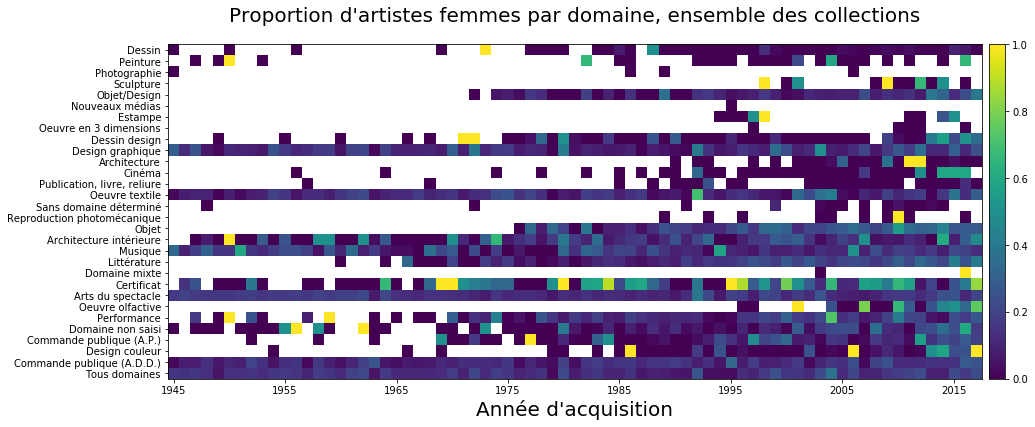

In [245]:
get_ratio_domains(art, art, "ensemble des collections", "./figures/domains_overall.png")